# 1-  Alucar: Análisando as vendas 

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### explorando os dados

In [4]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [5]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
print('Conversão do tipo mes => object, para tipo mes => datetime')
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

Conversão do tipo mes => object, para tipo mes => datetime


mes       datetime64[ns]
vendas             int64
dtype: object

### instalando bibliotecas gráficas

In [8]:
!pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

## aula 1 - Tendência das vendas

Gráfico 1: mostra a evolução das vendas 


<AxesSubplot:xlabel='mes', ylabel='vendas'>

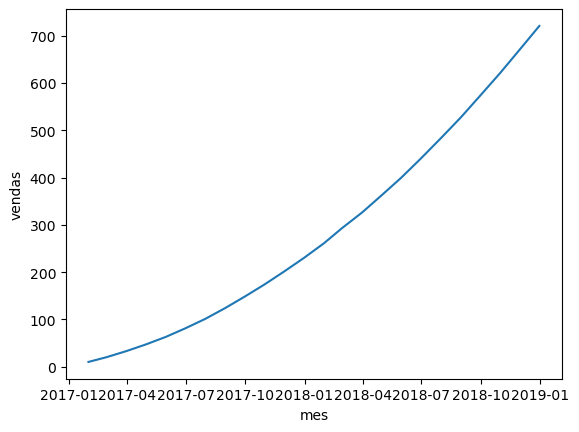

In [9]:
print('Gráfico 1: mostra a evolução das vendas ')
sns.lineplot(x='mes', y='vendas', data=alucar)

### editando o gráfico 1

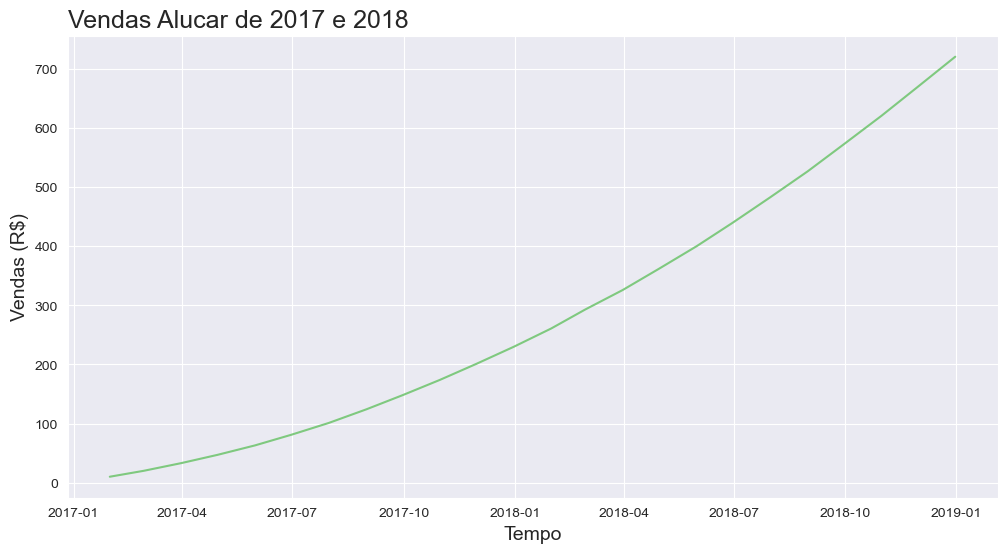

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax 


### criando função plotar(), para agilizar a edição dos gráficos

In [11]:
print('parametros da função plotar: titulo, labelx, labely, x, y, dataset')

parametros da função plotar: titulo, labelx, labely, x, y, dataset


In [12]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax 

## aula 2 - Decomposição e autocorrelação

In [13]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Decompondo as vendas

documentação [pandas.DataFrame.diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html?highlight=diff#pandas.DataFrame.diff)

In [14]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


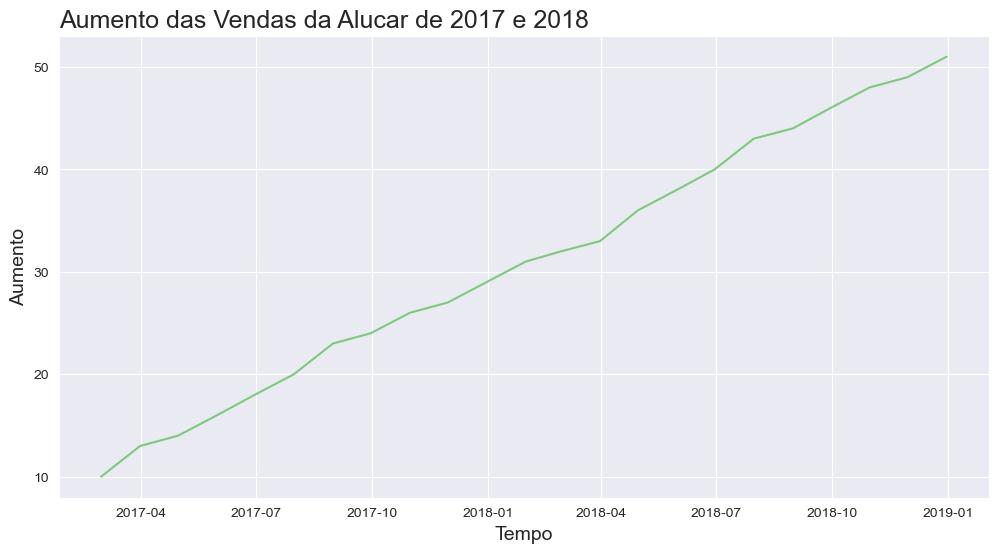

In [15]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [16]:
alucar['aceleração'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleração
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


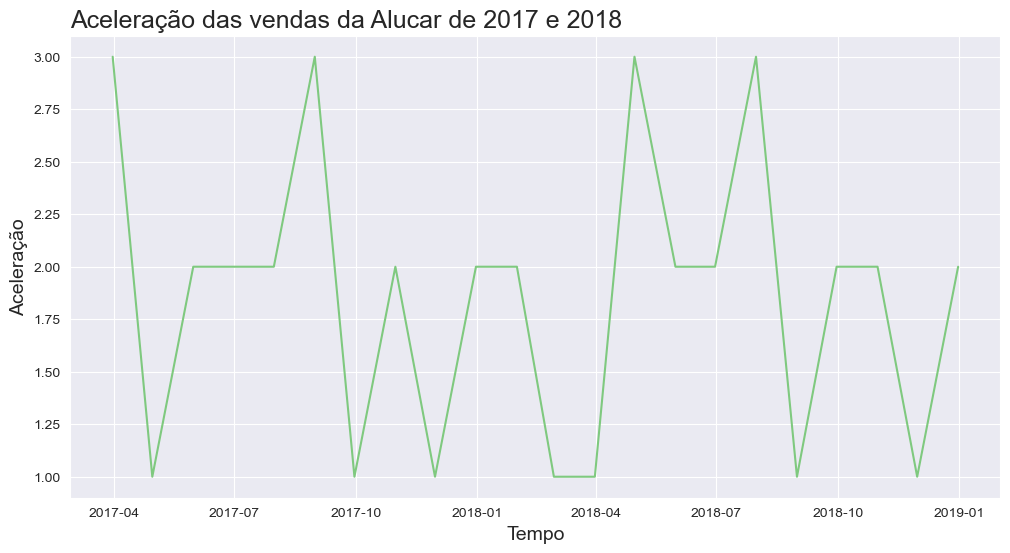

In [17]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleração', alucar)

### Observação e tendência

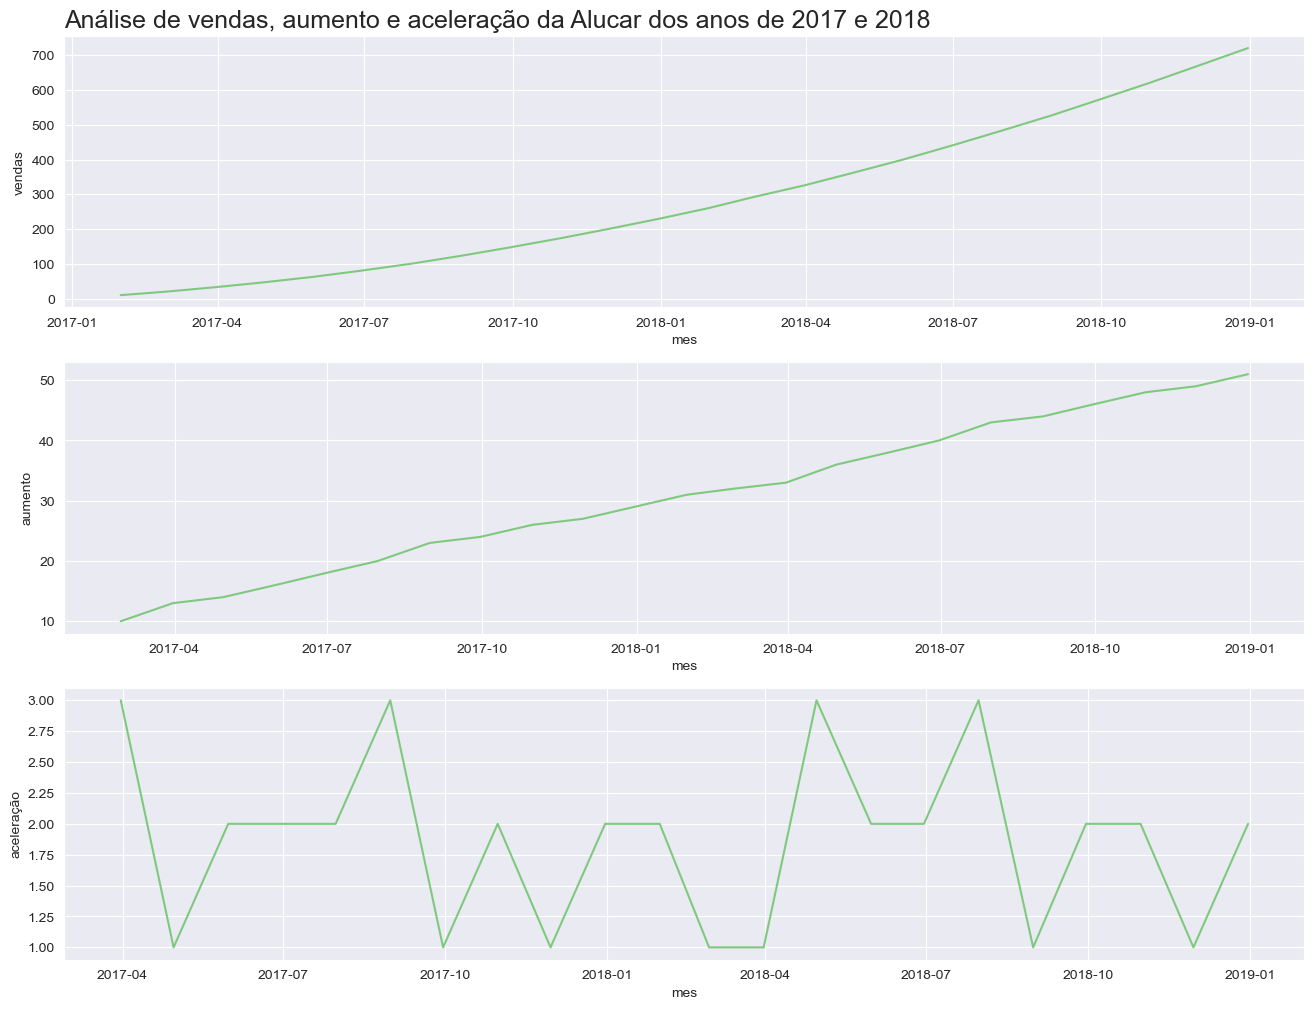

In [18]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas, aumento e aceleração da Alucar dos anos de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleração', data=alucar)
ax = ax

### criando função plot_comparacao(), para analise e observação de gráficos

In [19]:
print('parametros da função plot_comparacao : x, y1, y2, y3, dataset, titulo')

parametros da função plot_comparacao : x, y1, y2, y3, dataset, titulo


In [20]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax 
    

### Autocorrelação

In [21]:
from pandas.plotting import autocorrelation_plot

documentação [pandas.plotting.autocorrelation_plot](https://pandas.pydata.org/docs/reference/api/pandas.plotting.autocorrelation_plot.html?highlight=autocorrelation)

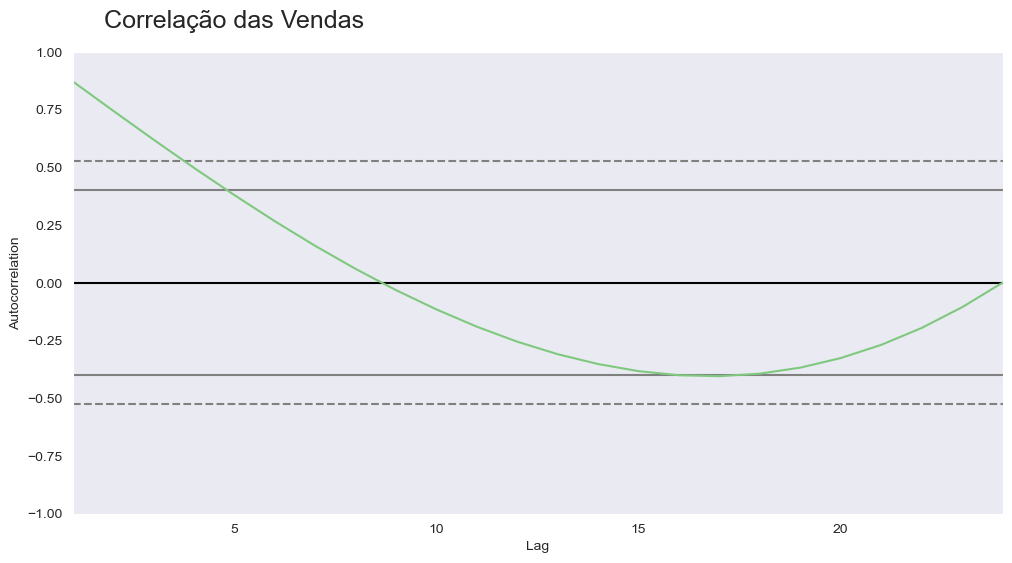

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

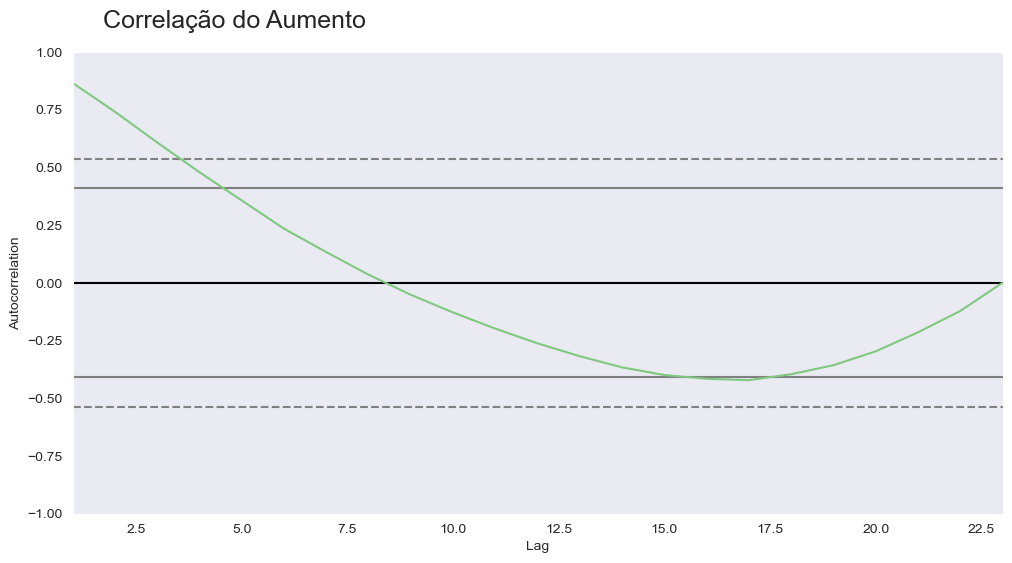

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

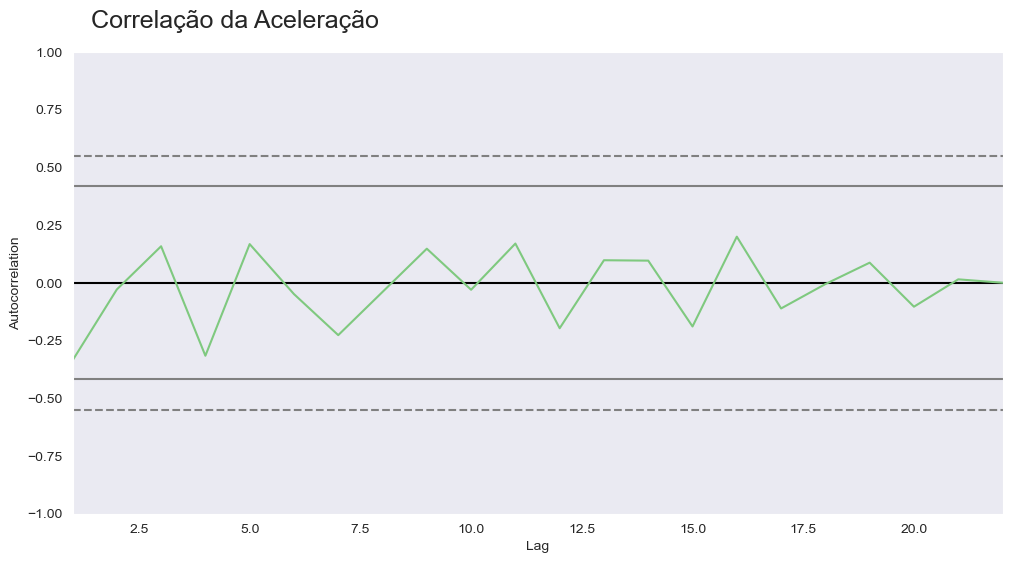

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleração'][2:])
ax = ax

# 2 - Alucar: Análisando assinantes da newsletter

In [25]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


### explorando os dados

In [26]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

### convertendo tipo object para datetime

In [28]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

## aula 3 - Importância da decomposição e sazonalidade

### Analisando assinantes

In [29]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleração'] = assinantes['aumento'].diff()

In [30]:
assinantes.head()

,mes,assinantes,aumento,aceleração
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


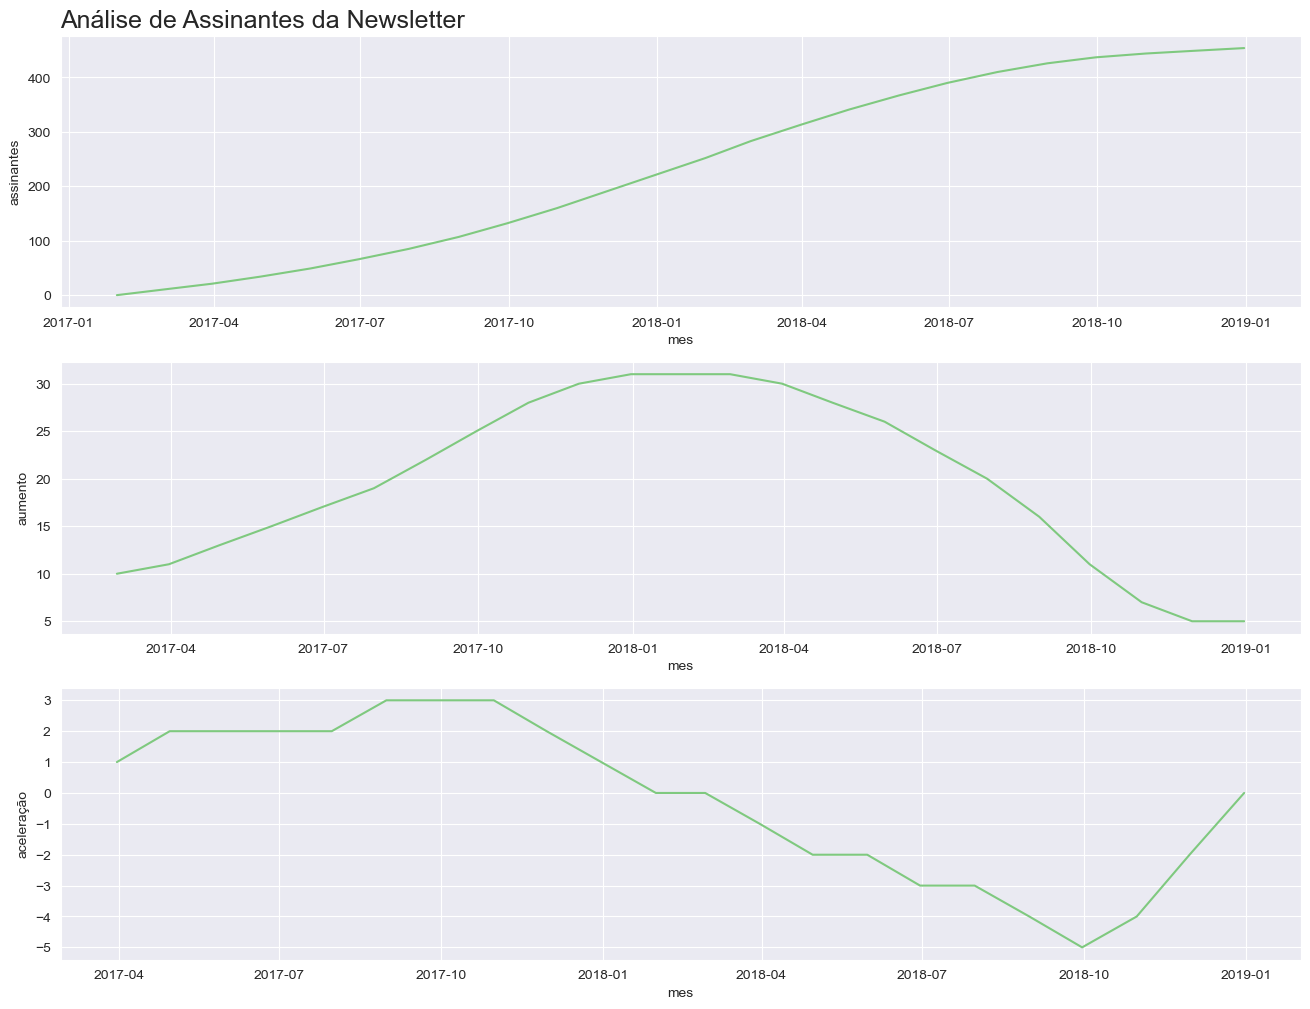

In [31]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleração',
                assinantes, 'Análise de Assinantes da Newsletter')

# 3 - Chocolura: Análisando as vendas

In [32]:
choco = pd.read_csv('dados/chocolura.csv')
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


### explorando os dados

In [33]:
print('Quantidade de linhas e colunas:', choco.shape)
print('Quantidade de dados nulos:', choco.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [34]:
choco.dtypes

mes       object
vendas     int64
dtype: object

### convertendo tipo object para datetime

In [35]:
choco['mes'] = pd.to_datetime(choco['mes'])
choco.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

### Sazonalidade e chocolate

In [36]:
choco['aumento'] = choco['vendas'].diff()
choco['aceleração'] = choco['aumento'].diff()
choco.head()

,mes,vendas,aumento,aceleração
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


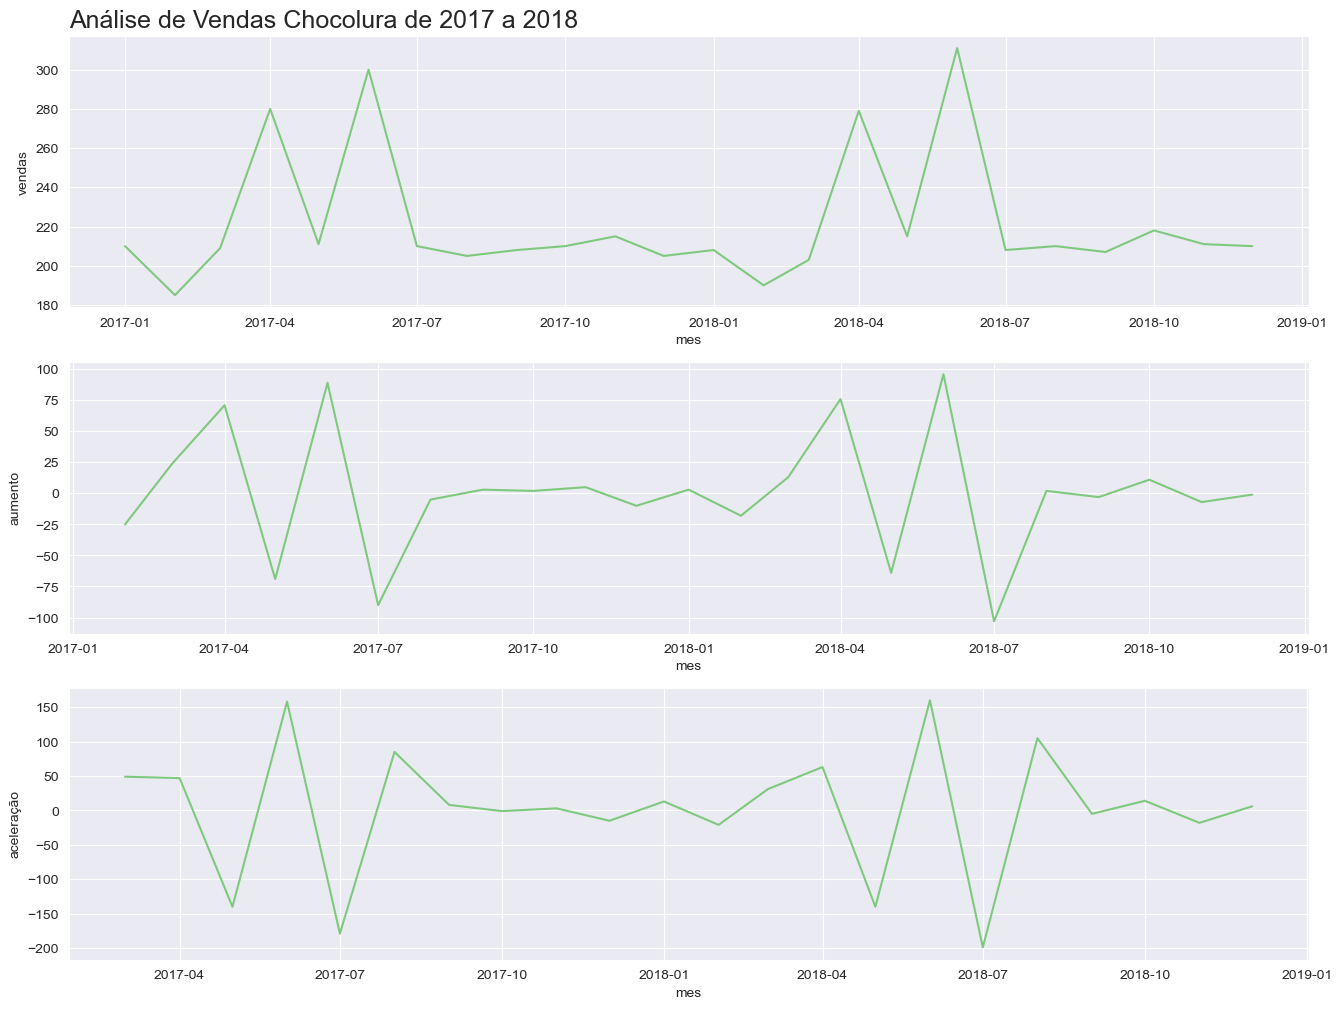

In [37]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleração', choco,
               'Análise de Vendas Chocolura de 2017 a 2018')

**Sazonalidade** = um padrão repetitivo dentro de um determinado periodo fixo de tempo. Nestes gráficos esse padrão se apresenta nos meses (04_abril e 06_junho), e estão diretamente ligados as datas da ***Páscoa e Dia dos Namorados***, por isso o aumento nas vendas de chocolate. 

# 4 - Chocolura: Análisando vendas diárias (Outubro e Novembro/2018)

In [38]:
vendas_diaria = pd.read_csv('dados/vendas_por_dia.csv')
vendas_diaria.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


### explorando os dados

In [39]:
print('Quantidade de linhas e colunas:', vendas_diaria.shape)
print('Quantidade de dados nulos:', vendas_diaria.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [40]:
vendas_diaria.dtypes

dia       object
vendas     int64
dtype: object

### convertendo tipo object para datetime

In [41]:
vendas_diaria['dia'] = pd.to_datetime(vendas_diaria['dia'])
vendas_diaria.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

### Investigando a sazonalidade

In [42]:
vendas_diaria['aumento'] = vendas_diaria['vendas'].diff()
vendas_diaria['aceleração'] = vendas_diaria['aumento'].diff()
vendas_diaria.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


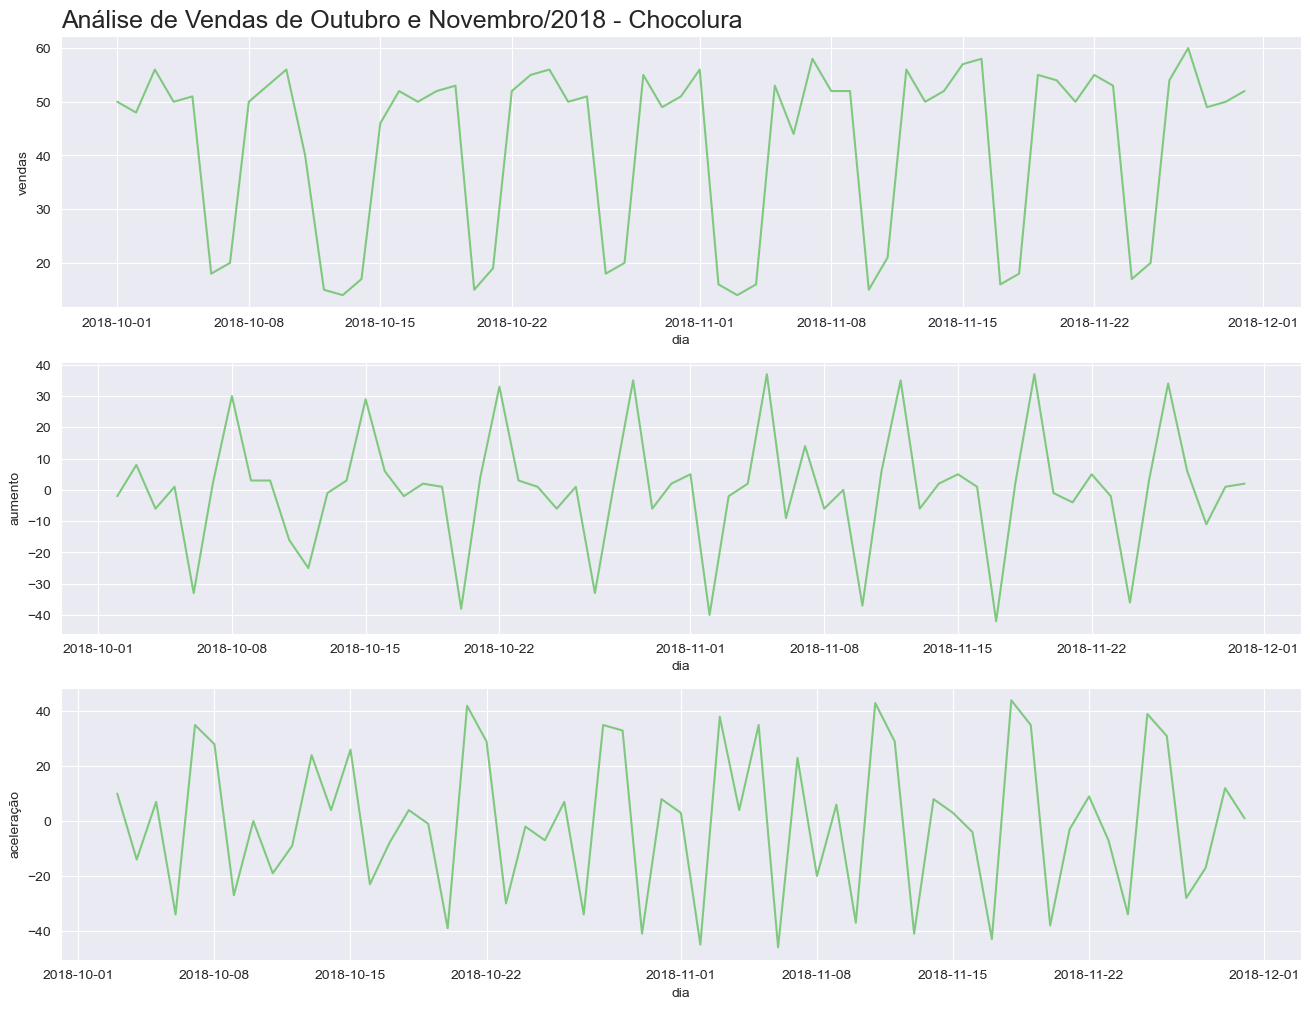

In [43]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleração',
               vendas_diaria, 'Análise de Vendas de Outubro e Novembro/2018 - Chocolura')

documentação [pandas.DatetimeIndex.day_name](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.day_name.html?highlight=day_name#pandas.DatetimeIndex.day_name)

In [44]:
vendas_diaria['dia_semana'] = vendas_diaria['dia'].dt.day_name()

In [45]:
vendas_diaria.head()

,dia,vendas,aumento,aceleração,dia_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [46]:
vendas_diaria['dia_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [47]:
dias_traduzidos = {'Monday': 'Segunda',
                   'Tuesday': 'Terça',
                   'Wednesday': 'Quarta',
                   'Thursday': 'Quinta',
                   'Friday': 'Sexta',
                   'Saturday': 'Sábado',
                   'Sunday': 'Domingo'
    
}

In [48]:
vendas_diaria['dia_semana'] = vendas_diaria['dia_semana'].map(dias_traduzidos)
vendas_diaria.head()

,dia,vendas,aumento,aceleração,dia_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [49]:
vendas_diaria.head(14)

,dia,vendas,aumento,aceleração,dia_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


### Agrupando os dias

In [50]:
vendas_agrupadas = vendas_diaria.groupby('dia_semana')['vendas', 'aumento', 'aceleração'].mean().round()

C:\Users\USER\AppData\Local\Temp\ipykernel_3520\931238743.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_diaria.groupby('dia_semana')['vendas', 'aumento', 'aceleração'].mean().round()


In [51]:
vendas_agrupadas

,vendas,aumento,aceleração
dia_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


Investigando as vendas diárias dos meses de outubro e novembro de uma loja específica da Chocolura, verificamos que a ***Sazonalidade*** esta ligada aos **finais de semanas e feriados**, onde as vendas apresentam uma ***queda forte***. É preciso analisar as regras de negócio da Chocolura referentes a esta loja. 

## aula 4 - Normalização

### Autocorrelação das vendas

#### correlação das vendas diárias

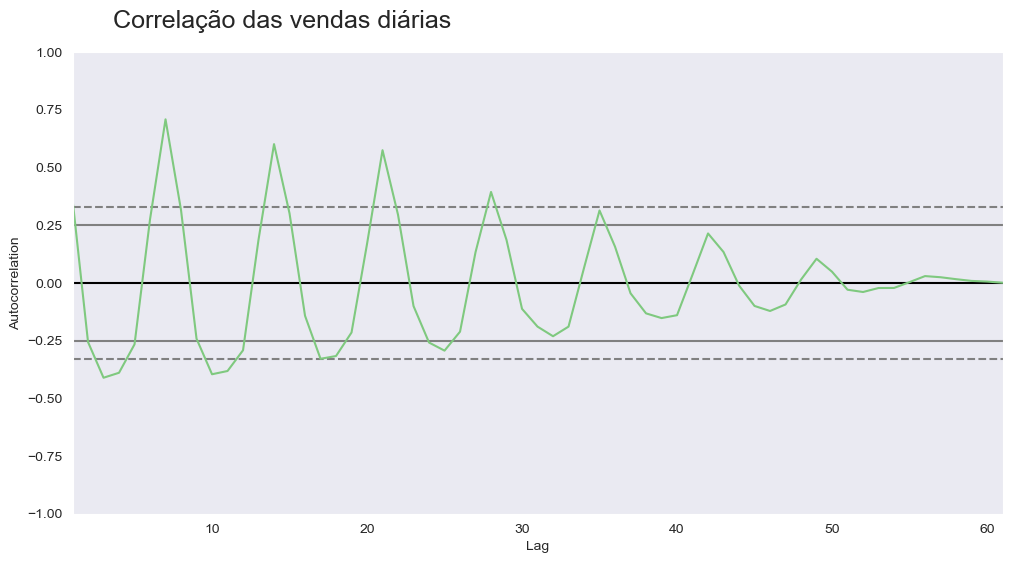

In [52]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_diaria['vendas'])
ax = ax

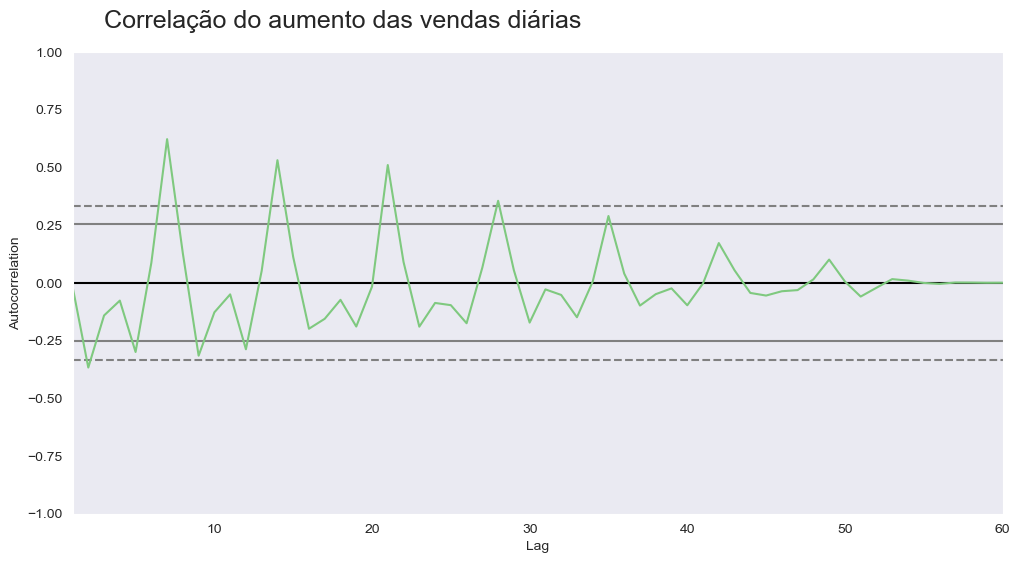

In [53]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_diaria['aumento'][1:])
ax = ax

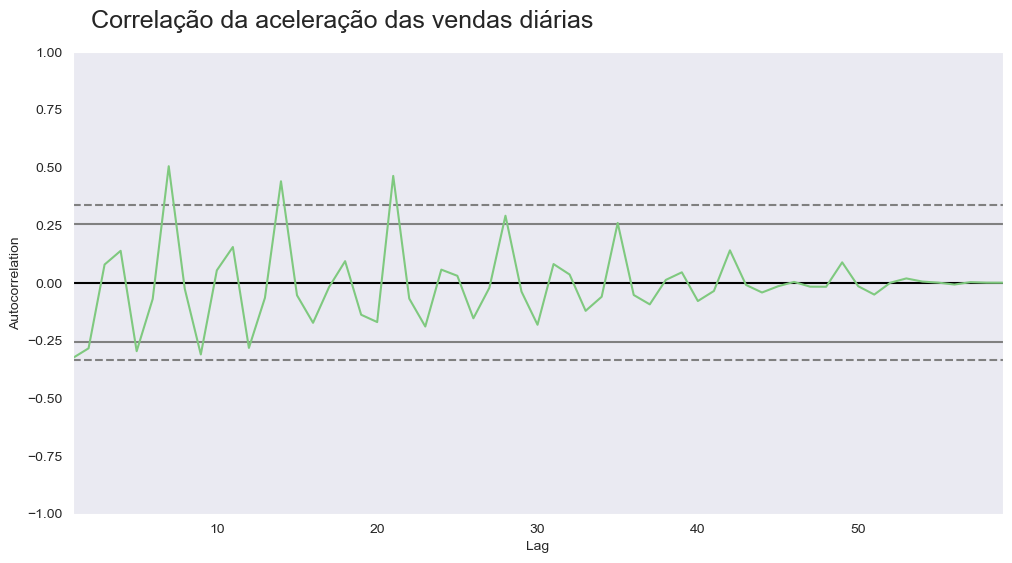

In [54]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_diaria['aceleração'][2:])
ax = ax

# 5 - Cafelura: Análise de vendas

In [55]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


### explorando os dados

In [56]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


### convertendo tipo object para datetime

In [57]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [58]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

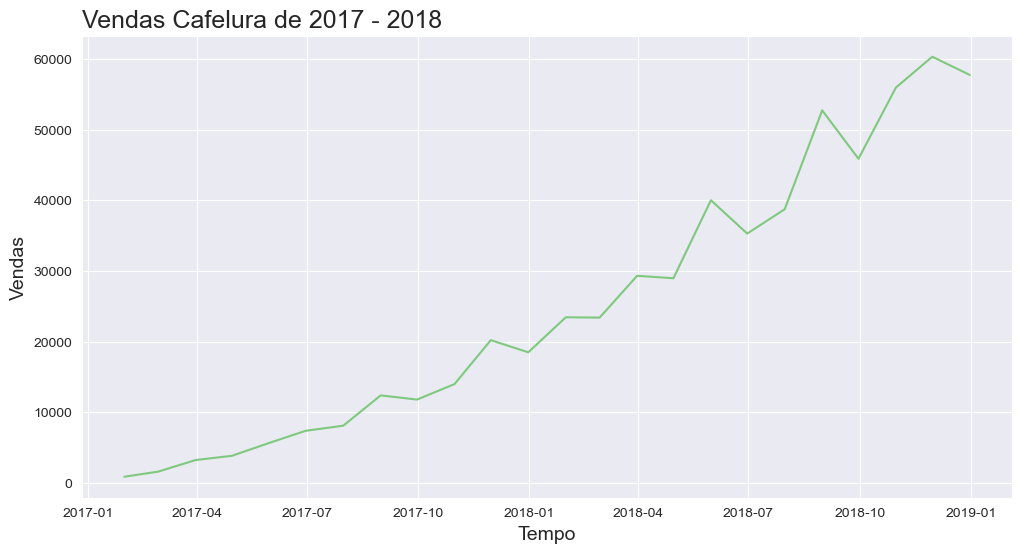

In [59]:
plotar('Vendas Cafelura de 2017 - 2018', 'Tempo',
       'Vendas', 'mes', 'vendas', cafelura)

In [60]:
quant_days_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quant_days_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [61]:
quant_days_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

### *Dividindo as vendas pela quantidade de finais de semana, para obter as vendas normalizadas*

In [62]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quant_days_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


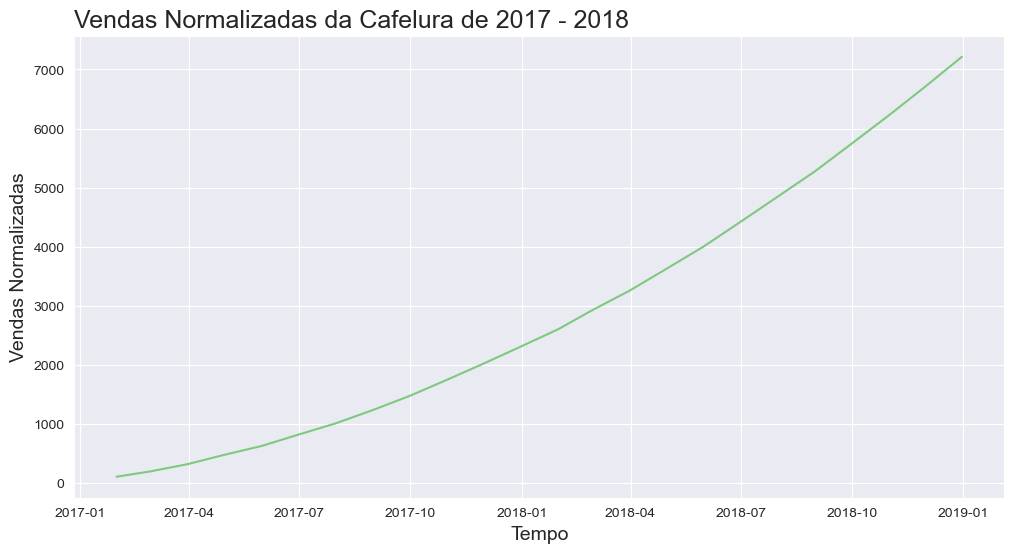

In [63]:
plotar('Vendas Normalizadas da Cafelura de 2017 - 2018',
       'Tempo','Vendas Normalizadas', 'mes',
       'vendas_normalizadas', cafelura)

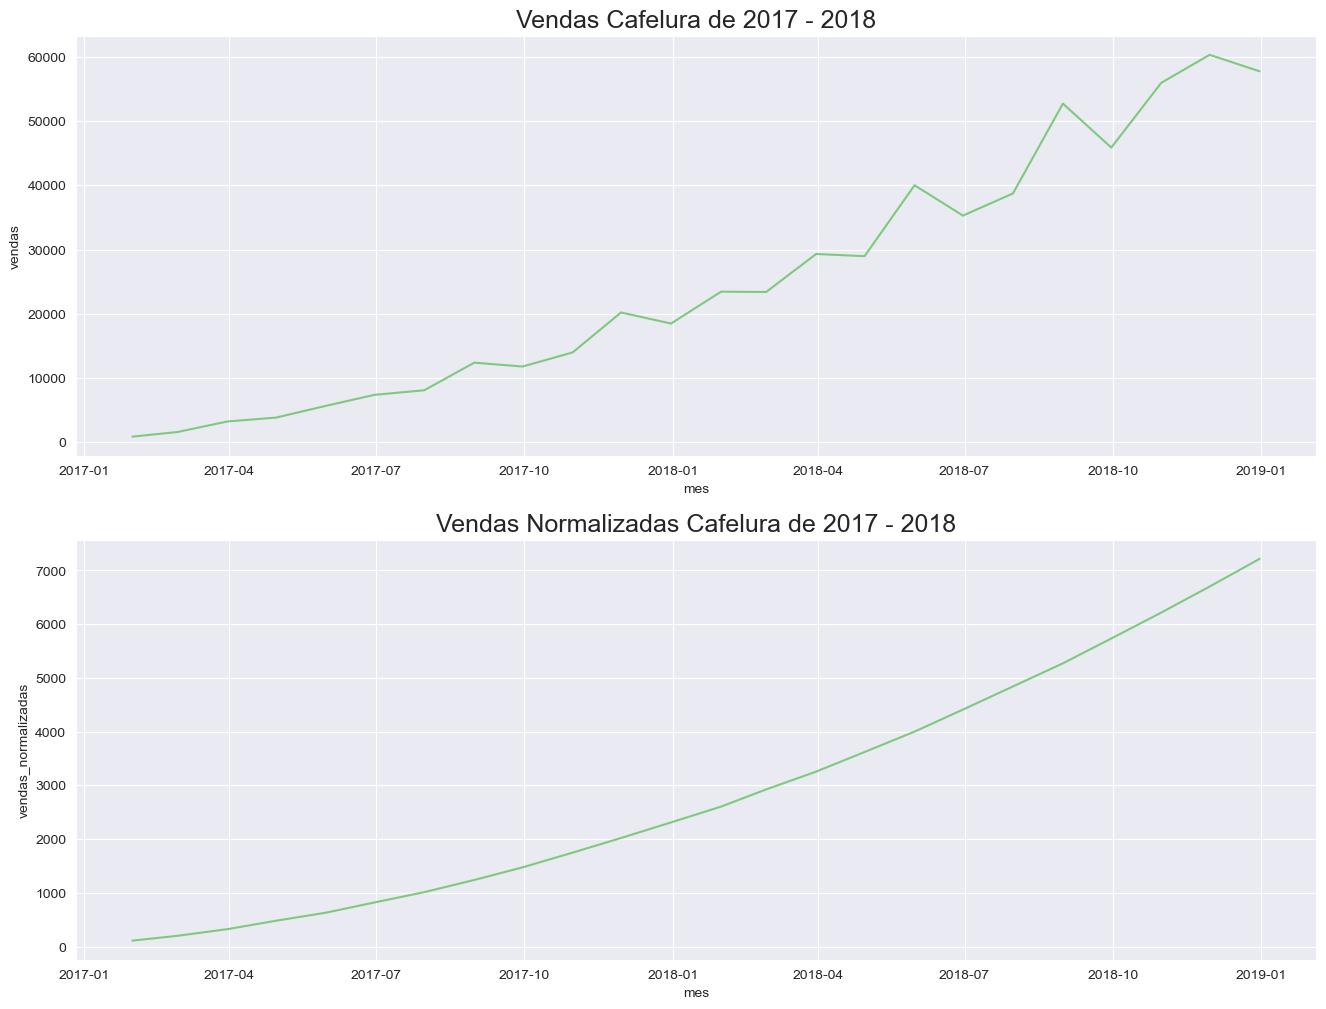

In [64]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura de 2017 - 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura de 2017 - 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax
